In [2]:
import numpy as np
import matplotlib.pyplot as plt

def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

def generate_series(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times, rate

def identify_clusters(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

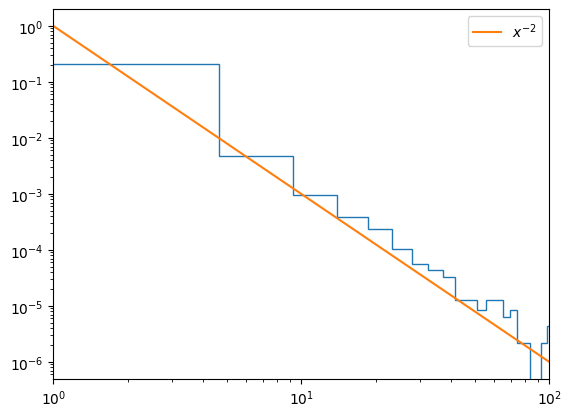

In [30]:
K = 10**5

x=np.random.pareto(a = 2, size = K)

xx = np.linspace(1,1000,1000)
yy = xx**(-3)
plt.hist(x, histtype='step', bins = 100,density=True)
plt.plot(xx,yy, label='$x^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim((1,100))
plt.show()

0.019751


C:\Users\anton\AppData\Local\Temp\ipykernel_23252\1790865038.py:16: RuntimeWarning: invalid value encountered in divide
  print(s_hist2[0]/s_hist_norm)


[1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896 1.02014896
 1.02014896 1.02014896 1.02014896        nan 1.02014896 1.02014896
        nan]


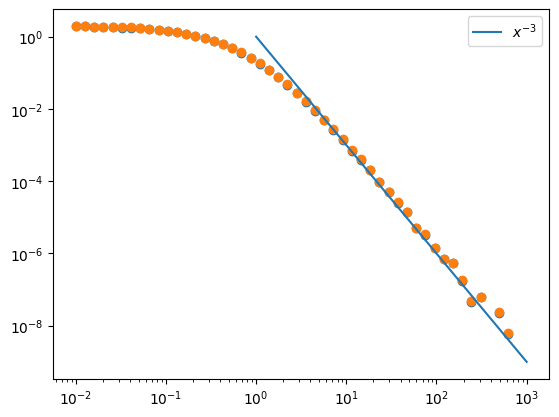

In [52]:
K = 10**6

x=np.random.pareto(a = 2, size = K)

print(len(x[x<0.01])/K)

xx = np.linspace(1,1000,1000)
yy = xx**(-3)


s_bins = np.logspace(-2, 3, num = 50, base = 10)
s_widths = (s_bins[1:] - s_bins[:-1])
s_hist = np.histogram(x, bins=s_bins)
s_hist_norm = s_hist[0]/s_widths/K
s_hist2 = np.histogram(x, bins=s_bins, density=True)
print(s_hist2[0]/s_hist_norm)

plt.plot(xx,yy,label='$x^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.scatter(s_bins[:-1],s_hist_norm)
plt.scatter(s_bins[:-1],s_hist2[0])
plt.show()

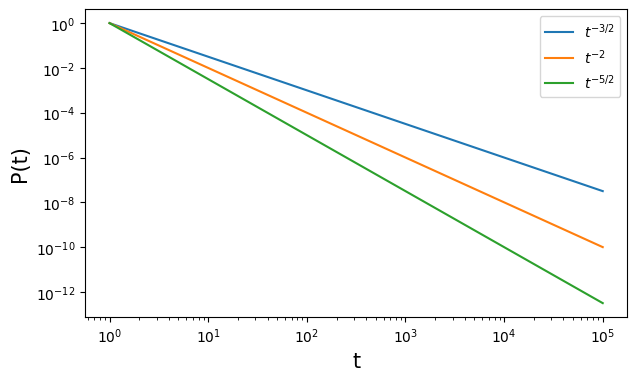

In [7]:
x = np.linspace(1,100000,100)
y1 = x**(-2)
y2 = x**-(5/2)
y3 = x**-(3/2)
plt.figure(figsize=(7,4))

plt.plot(x,y3,label='$t^{-3/2}$')
plt.plot(x,y1,label='$t^{-2}$')
plt.plot(x,y2,label='$t^{-5/2}$')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('t', fontsize=15)   
plt.ylabel('P(t)', fontsize=15)
plt.legend()
plt.show()
